In [1]:
%matplotlib inline

import numpy as np
from numpy import array 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from collections import Counter
from collections import defaultdict
from sklearn import metrics

from sklearn import tree
import scikitplot as skplt

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

import scikitplot as skplt
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from scipy.special import expit
from sklearn.svm import LinearSVC

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randint



## Dataset

In [2]:
df = pd.read_csv("df_RFE_6Class_LOF.csv")
df = df.drop(columns = ["Unnamed: 0"])
df = df[df["label"] != 6]

In [3]:
df

,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-Y,1",...,fBodyAcc-max()-Y,fBodyAccJerk-max()-Y,"fBodyAccJerk-bandsEnergy()-1,16",fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)",label
0,-0.714892,-0.013429,0.579382,-0.141551,0.892060,0.122586,0.984520,-0.114893,-0.970583,-0.196359,...,-0.973770,-0.984923,-0.999987,-1.000000,-0.048167,-0.975777,-0.999472,-0.996399,0.180289,5
1,-0.592235,-0.124698,0.608900,-0.142010,0.892401,0.094566,0.986770,-0.114893,-0.970368,-0.329023,...,-0.963072,-0.985351,-0.999963,-1.000000,-0.216685,-0.985594,-0.999807,-0.995127,0.180637,5
2,-0.627446,-0.305693,0.507459,-0.143976,0.893817,0.093425,0.986821,-0.121336,-0.969400,-0.295036,...,-0.987275,-0.987874,-0.999978,-1.000000,0.216862,-0.983524,-0.999770,-0.995237,0.181935,5
3,-0.786553,-0.155804,0.599213,-0.148750,0.893817,0.091682,0.987434,-0.121834,-0.967051,-0.166693,...,-0.980848,-0.990373,-0.999988,-1.000000,-0.153343,-0.992324,-0.999873,-0.995465,0.185151,5
4,-0.751869,-0.209979,0.180424,-0.148210,0.893683,0.083347,0.987722,-0.121834,-0.967321,-0.198125,...,-0.993414,-0.992801,-0.999987,-0.933333,-0.363040,-0.993851,-0.999939,-0.995239,0.184823,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,0.195643,-0.211822,-0.283335,-0.222004,0.867718,-0.016391,0.920554,-0.234998,-0.918375,-0.689028,...,-0.224135,-0.614001,-0.775736,-1.000000,-0.434780,-0.007392,-0.584282,-0.723951,0.238604,2
7033,0.178138,-0.198555,-0.274504,-0.242054,0.866116,-0.016391,0.920554,-0.234998,-0.902880,-0.662997,...,-0.261767,-0.613520,-0.780751,-0.933333,-0.516570,-0.172448,-0.632536,-0.771183,0.252676,2
7034,0.173131,-0.226826,-0.198452,-0.236950,0.854641,0.024684,0.933008,-0.216004,-0.907561,-0.459707,...,-0.263932,-0.626141,-0.783616,-0.933333,-0.289537,-0.216074,-0.641170,-0.726372,0.249145,2
7035,0.160333,-0.257775,-0.189915,-0.233230,0.855988,0.024684,0.933008,-0.210542,-0.910648,-0.418440,...,-0.262225,-0.542854,-0.821137,-0.933333,-0.362980,-0.220443,-0.663579,-0.689421,0.246432,2


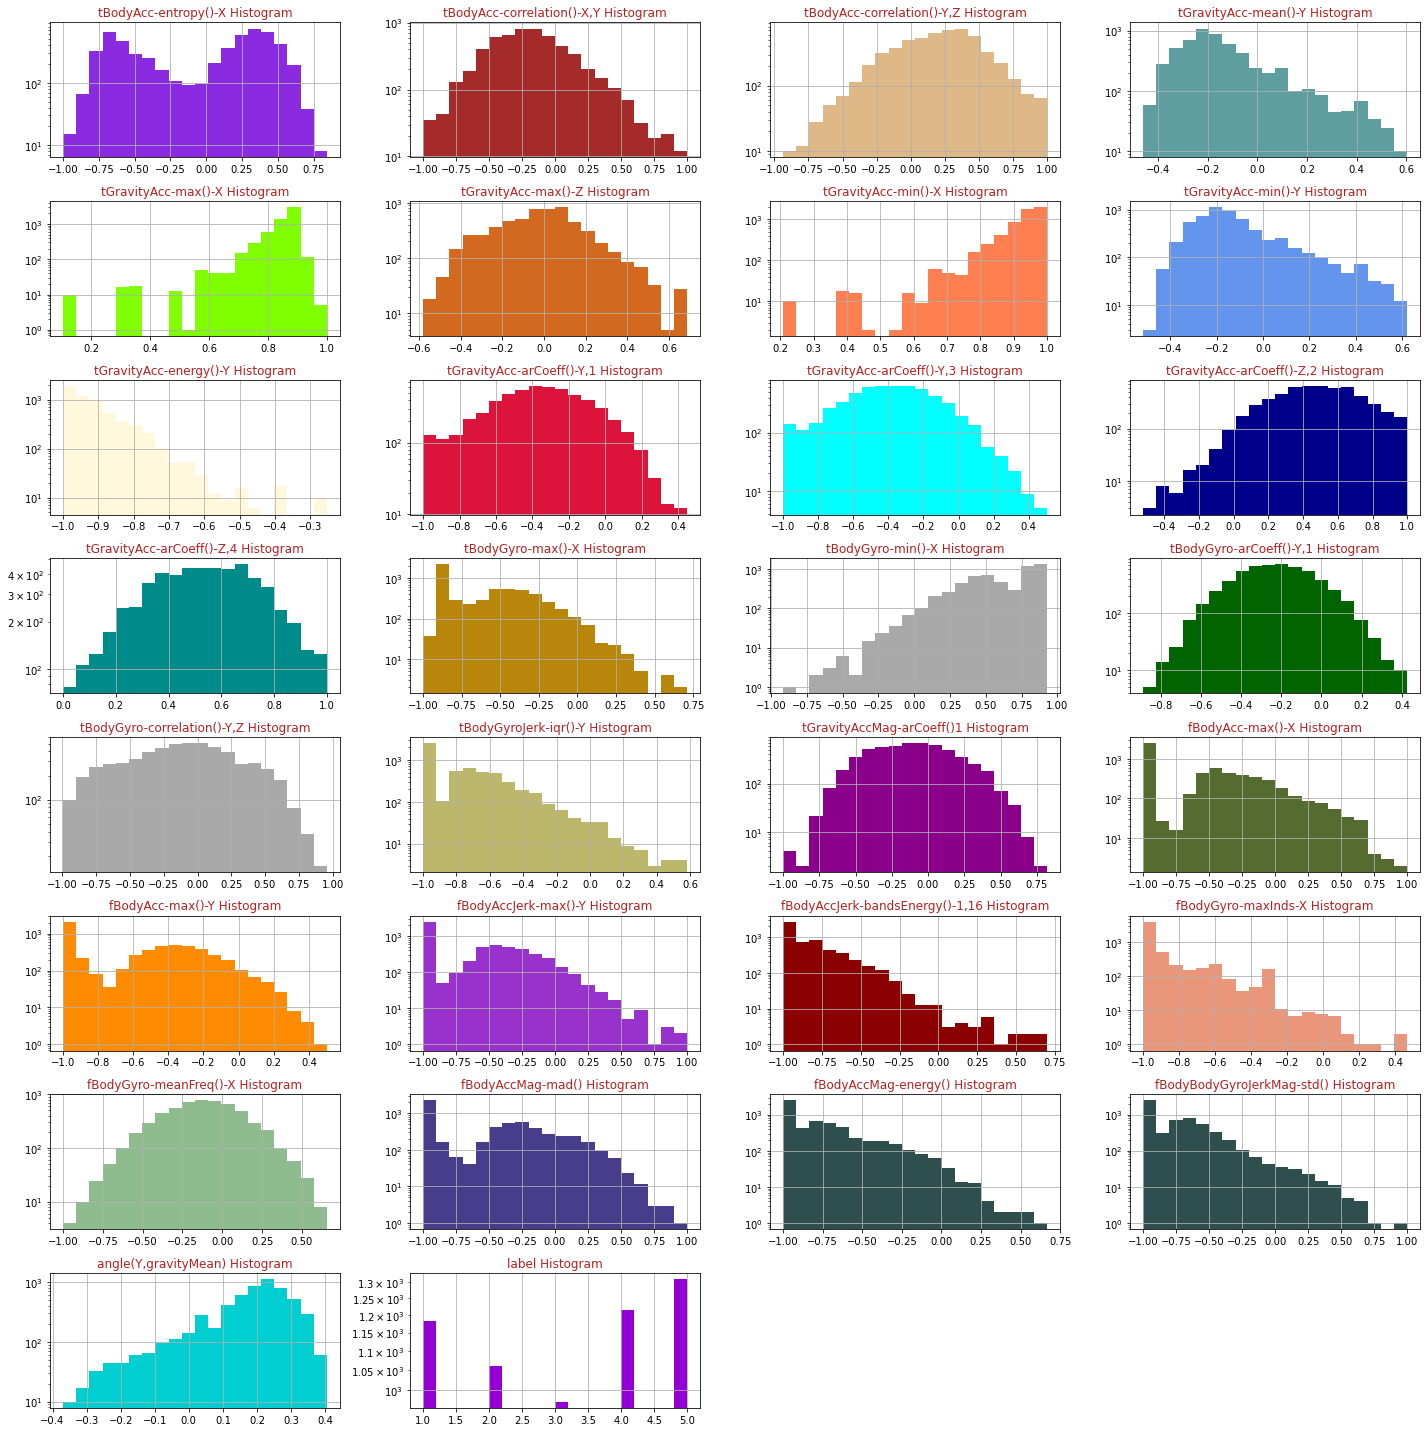

In [38]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

In [4]:
df_test = pd.read_csv("df_RFE_test.csv")
df_test = df_test[df_test["label"] != 6]
df_test = df_test.drop(columns = ["Unnamed: 0"])
df_test

,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-Y,1",...,fBodyAcc-max()-Y,fBodyAccJerk-max()-Y,"fBodyAccJerk-bandsEnergy()-1,16",fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)",label
0,-0.168084,0.076989,-0.709003,-0.282719,0.906083,0.152895,0.944461,-0.262160,-0.864621,-0.795468,...,-0.940137,-0.958325,-0.998040,-1.000000,0.184035,-0.726707,-0.953984,-0.907308,0.276801,5
1,-0.302437,-0.104983,0.399177,-0.289215,0.856176,0.152895,0.944461,-0.262160,-0.858163,-0.745687,...,-0.974357,-0.987087,-0.999641,-1.000000,0.018109,-0.960680,-0.998476,-0.938212,0.281343,5
2,-0.617916,0.305653,0.279786,-0.287513,0.856269,0.139454,0.948704,-0.261661,-0.859947,-0.231640,...,-0.983773,-0.975581,-0.999954,-1.000000,-0.479145,-0.977176,-0.999570,-0.983273,0.280083,5
3,-0.749578,-0.063792,0.544916,-0.293396,0.856269,0.136124,0.947309,-0.272916,-0.853713,-0.233036,...,-0.987887,-0.979580,-0.999949,-1.000000,-0.496954,-0.976796,-0.999504,-0.985843,0.284114,5
4,-0.590576,0.235151,0.457718,-0.302961,0.853942,0.133541,0.946221,-0.279190,-0.843378,-0.493331,...,-0.972039,-0.975105,-0.999955,-1.000000,-0.427502,-0.975706,-0.999500,-0.990572,0.290722,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.128951,-0.258908,-0.022682,-0.276718,0.823272,0.226640,0.903413,-0.272203,-0.870515,-0.676626,...,-0.397114,-0.659382,-0.792017,-1.000000,-0.038775,-0.202661,-0.702110,-0.618829,0.274627,2
2943,0.311991,-0.249325,0.031417,-0.274976,0.823272,0.220590,0.903793,-0.268172,-0.872342,-0.548616,...,-0.363990,-0.604243,-0.807522,-1.000000,-0.258493,-0.196060,-0.674032,-0.592507,0.273578,2
2944,0.342902,-0.351080,0.118835,-0.276165,0.822107,0.220590,0.903793,-0.268172,-0.871197,-0.566802,...,-0.292071,-0.533585,-0.830224,-1.000000,-0.083427,-0.208208,-0.715711,-0.617948,0.274479,2
2945,0.194918,-0.190791,0.122642,-0.262356,0.823679,0.231517,0.909007,-0.244744,-0.884788,-0.641468,...,-0.415850,-0.661178,-0.838522,-0.933333,-0.242417,-0.259605,-0.745225,-0.654960,0.264782,2


In [5]:
attributes = [col for col in df_test.columns if col != 'label']

X_train = df[attributes].values
y_train = np.array(df['label'])

X_test = df_test[attributes].values
y_test = np.array(df_test['label'])
X_train.shape,y_train.shape

((5739, 29), (5739,))

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Dataset: RFE (30 classi), No outliers (-57 outliers), StandardScaler()

In [7]:
pca = PCA(n_components=2).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier()
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6663900414937759
F1-score [0.66548985 0.73963134 0.49230769 0.6695747  0.72905526]
              precision    recall  f1-score   support

           1       0.59      0.76      0.67       496
           2       0.81      0.68      0.74       471
           3       0.53      0.46      0.49       420
           4       0.72      0.63      0.67       491
           5       0.69      0.77      0.73       532

    accuracy                           0.67      2410
   macro avg       0.67      0.66      0.66      2410
weighted avg       0.67      0.67      0.66      2410



In [8]:
knn3 = KNeighborsClassifier().fit(X_train_pca, y_train)
y_pred_knn3 = knn3.predict(X_test_pca)
print(classification_report(y_test, y_pred_knn3))

              precision    recall  f1-score   support

           1       0.58      0.82      0.68       496
           2       0.86      0.70      0.77       471
           3       0.60      0.43      0.50       420
           4       0.82      0.62      0.71       491
           5       0.71      0.87      0.79       532

    accuracy                           0.70      2410
   macro avg       0.71      0.69      0.69      2410
weighted avg       0.72      0.70      0.70      2410



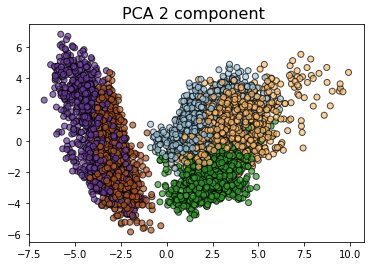

In [9]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, -1], c=y_train, cmap="Paired", edgecolor='k', alpha=0.7)
plt.title("PCA 2 component ", fontsize = 16)
plt.show()

# SVM

In [11]:
param_dist = {"kernel": ['rbf', 'sigmoid',"poly"], # fondamentale per plottare le regioni di piano
              "C": sp_randint(1, 10),
              "gamma": ["scale", "auto"], # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
              "probability": [True, False], # Whether to enable probability estimates. 
              "class_weight":['balanced', None]}
#define the number of iters
n_iter_search = 20
#define the model
clf = SVC()
#define the grid search
grid_search = RandomizedSearchCV(clf, param_distributions=param_dist, 
                            n_iter=n_iter_search, 
                            n_jobs=10, 
                            scoring=make_scorer(accuracy_score), verbose=5)
#run the grid search
grid_search.fit(X_train, y_train)

print('Best setting parameters\n', grid_search.cv_results_['params'][0])
print('\nMean of this setting\n', grid_search.cv_results_['mean_test_score'][0], 
      '\n\nStandard Deviation (std) of this setting\n', grid_search.cv_results_['std_test_score'][0])

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best setting parameters
 {'C': 6, 'class_weight': None, 'gamma': 'scale', 'kernel': 'poly', 'probability': False}

Mean of this setting
 0.8987669697347116 

Standard Deviation (std) of this setting
 0.026105048742860428


In [12]:
grid_search.best_params_

{'C': 1,
 'class_weight': None,
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True}

## RBF

In [13]:
clf = SVC(kernel="rbf", C=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8966804979253112
F1-score [0.92730845 0.85412262 0.90617284 0.8907563  0.90310786]
              precision    recall  f1-score   support

           1       0.90      0.95      0.93       496
           2       0.85      0.86      0.85       471
           3       0.94      0.87      0.91       420
           4       0.92      0.86      0.89       491
           5       0.88      0.93      0.90       532

    accuracy                           0.90      2410
   macro avg       0.90      0.90      0.90      2410
weighted avg       0.90      0.90      0.90      2410



In [14]:
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

[106 122 117 321 279]


In [15]:
support_vector_indices = clf.support_
print(len(support_vector_indices))

945


In [16]:
predictions = cross_val_predict(clf, X_test, y_test)

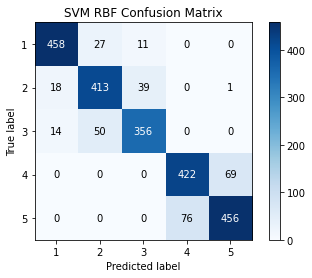

In [17]:
skplt.metrics.plot_confusion_matrix(y_test, predictions)
plt.title('SVM RBF Confusion Matrix')
plt.show()

## Sigmoid

In [18]:
clf2 = SVC(C= 10, kernel= 'sigmoid')
clf2.fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred2))
print('F1-score %s' % f1_score(y_test, y_pred2,average=None))

Accuracy 0.7825726141078838
F1-score [0.80829016 0.74407583 0.80349345 0.75746269 0.79765396]


In [19]:
support_vectors_per_class2 = clf2.n_support_
print(support_vectors_per_class2)

[172 210 161 286 273]


In [20]:
support_vector_indices = clf2.support_
print(len(support_vector_indices))

1102


## Linear

In [21]:
clf3 = SVC(kernel="linear", C=10)
clf3.fit(X_train, y_train)

y_pred3 = clf3.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred3))
print('F1-score %s' % f1_score(y_test, y_pred3, average=None))

Accuracy 0.8921161825726142
F1-score [0.90656799 0.85227273 0.94275274 0.87011616 0.89092576]


## Poly

In [22]:
clf4 = SVC(kernel="poly", C=10)
clf4.fit(X_train, y_train)

y_pred4 = clf4.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred4))
print('F1-score %s' % f1_score(y_test, y_pred4,average=None))

Accuracy 0.8568464730290456
F1-score [0.86526123 0.77828054 0.87654321 0.86206897 0.89250226]


# Plot

In [23]:
decision_function = clf.decision_function(X_train)
support_vector_indices = clf.support_
support_vectors = X_train[support_vector_indices]

In [24]:
support_vectors_pca = pca.transform(support_vectors)
support_vectors_pca.shape

(945, 2)

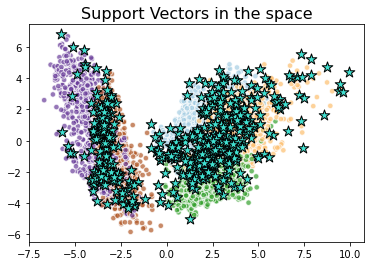

In [25]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="Paired", edgecolor='White', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:500, 0], support_vectors_pca[:500, 1], s=125,
                linewidth=1, marker ="*",facecolors='turquoise', edgecolors='k')
plt.title("Support Vectors in the space", fontsize = 16)
plt.show()

In [58]:
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
scores2 = cross_val_score(clf2, X_train, y_train, cv=5, scoring='accuracy')
scores3 = cross_val_score(clf3, X_train, y_train, cv=5, scoring='accuracy')
scores4 = cross_val_score(clf4, X_train, y_train, cv=5, scoring='accuracy')

In [63]:
print("- VALORI Rbf - \n")

print("Accuracy:   \t\t", round(metrics.accuracy_score(y_test, y_pred),3))
print('F1- Score:\t\t', round(metrics.f1_score(y_test, y_pred, average="weighted"),3))
print("Cross Validation:\t", round(scores.mean(),3),"\n")

print("- VALORI Sigmoid - \n")

print("Accuracy:   \t\t", round(metrics.accuracy_score(y_test, y_pred2),3))
print('F1- Score:\t\t', round(metrics.f1_score(y_test, y_pred2,average="weighted"),3))
print("Cross Validation:\t", round(scores2.mean(),3),"\n")

print("- VALORI Linear - \n")

print("Accuracy:   \t\t", round(metrics.accuracy_score(y_test, y_pred3),3))
print('F1- Score:\t\t', round(metrics.f1_score(y_test, y_pred3,average="weighted"),3))
print("Cross Validation:\t", round(scores3.mean(),3),"\n")

print("- VALORI Poly - \n")

print("Accuracy:   \t\t", round(metrics.accuracy_score(y_test, y_pred4),3))
print('F1- Score:\t\t', round(metrics.f1_score(y_test, y_pred4,average="weighted"),3))
print("Cross Validation:\t", round(scores4.mean(),3),"\n")

- VALORI Rbf - 

Accuracy:   		 0.897
F1- Score:		 0.897
Cross Validation:	 0.909 

- VALORI Sigmoid - 

Accuracy:   		 0.783
F1- Score:		 0.782
Cross Validation:	 0.815 

- VALORI Linear - 

Accuracy:   		 0.892
F1- Score:		 0.891
Cross Validation:	 0.891 

- VALORI Poly - 

Accuracy:   		 0.83
F1- Score:		 0.828
Cross Validation:	 0.899 



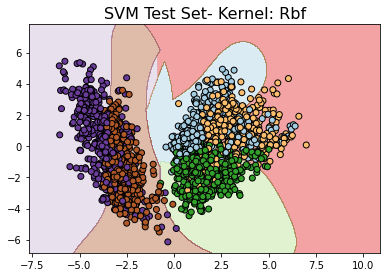

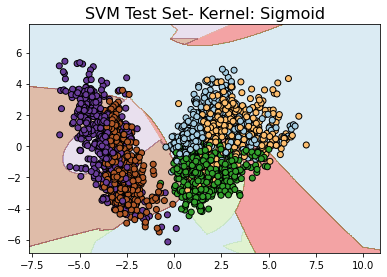

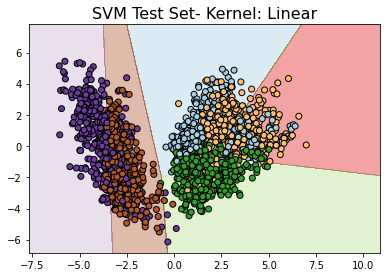

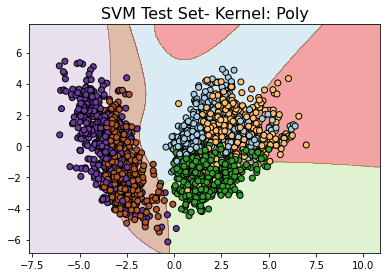

In [26]:
# Our dataset and targets
X = X_train_pca
Y = y_train

# figure number
fignum = 1

for kernel in ("rbf","sigmoid","linear","poly"):
    clf = SVC(kernel=kernel, C= 10)
    clf.fit(X,Y)
    
    plt.figure(fignum, figsize=(6.3,4.2))
    plt.clf()


    # Circle out the test data
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, zorder=10, cmap="Paired", edgecolor='k')


    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap="Paired")
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    fignum = fignum + 1

    plt.title("SVM Test Set- Kernel: "+kernel.capitalize(), fontsize = 16)
plt.show()

C:\Users\daddu\AppData\Local\Temp/ipykernel_12468/3446071239.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)
C:\Users\daddu\AppData\Local\Temp/ipykernel_12468/3446071239.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0)
C:\Users\daddu\AppData\Local\Temp/ipykernel_12468/3446071239.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated sinc

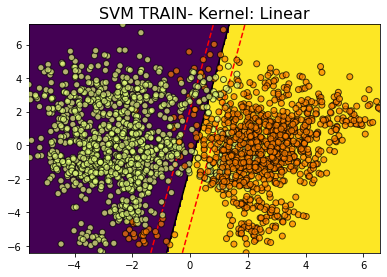

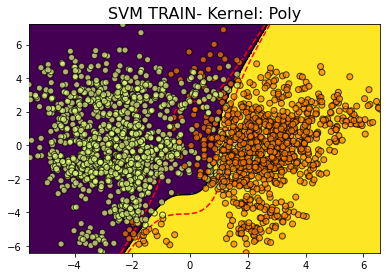

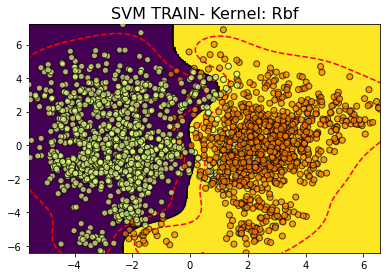

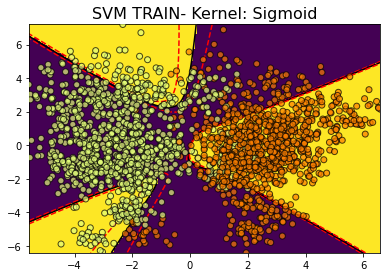

In [194]:
# Our dataset and targets
X = X_train_pca
Y = y_train

# figure number
fignum = 1

# fit the model
for kernel in ("linear", "poly", "rbf", "sigmoid"):
    clf = svm.SVC(kernel=kernel, C= 0.1, class_weight= 'balanced', gamma= 'auto', probability= True)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(6.3,4.2))
    plt.clf()

    
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, zorder=10, cmap="Wistia", edgecolors="k", alpha=0.7)

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.contour(
        XX,
        YY,
        Z,
        colors=["red", "k", "red"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("SVM TRAIN- Kernel: "+kernel.capitalize(), fontsize = 16)

    fignum = fignum + 1
plt.show()

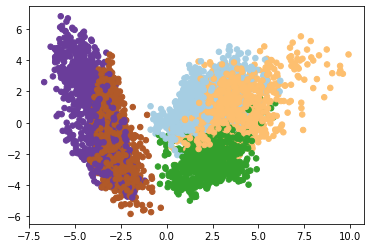

In [65]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

No handles with labels found to put in legend.


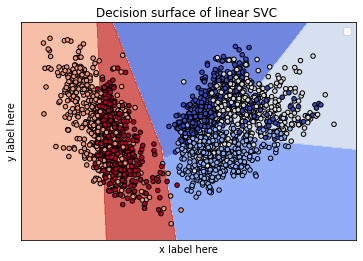

In [90]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Y label')
ax.set_xlabel('X Label')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

C:\Users\daddu\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


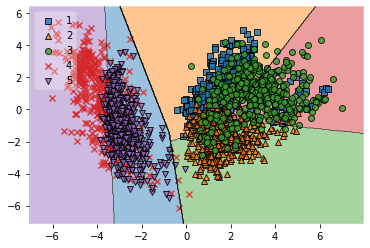

In [101]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_test_pca, y_test, clf=clf, legend=2)
plt.show()

C:\Users\daddu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 29 features as input.

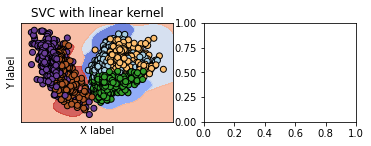

In [127]:
X = X_test_pca
y = y_test

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((clf, clf2)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2,2, i + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap="Paired", edgecolor='k')
    plt.xlabel('X label')
    plt.ylabel('Y label')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [130]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [138]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='rbf', C=1, random_state=0)
# Train the classifier
svm.fit(X_train_pca, y_train)


SVC(C=1, random_state=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

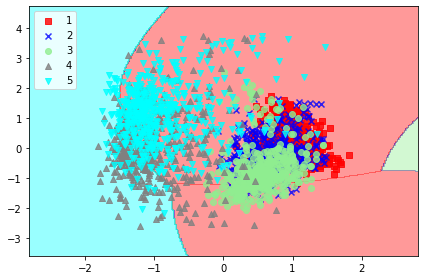

In [139]:
plot_decision_regions(X_test, y_test, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()